<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/machine_learning/classification

/content/drive/MyDrive/machine_learning/classification


In [3]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Support Vector Machine (SVM) 분류 모델

## [P.1] Maximal margin SVM

iris 붓꽃 데이터를 활용해 SVM의 이미지 분류 모델을 만들어볼 것임

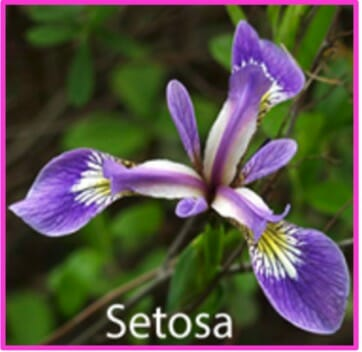

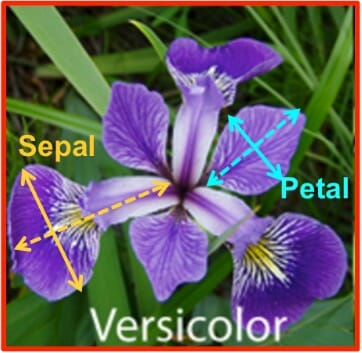

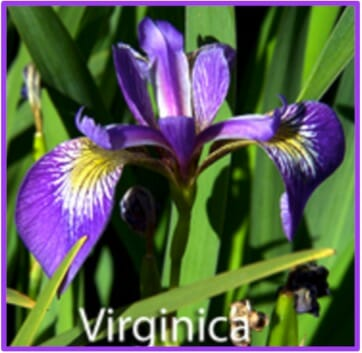

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris)

# 0, 1 : sepal length, sepal width
X = iris["data"][:, (2, 3)]  # 2, 3 : petal length, petal width
y = iris["target"] # 0 : Setosa, 1 : Versicolor, 2 : Virginica

idx = (y == 0) + (y == 1)
X = X[idx]
y = y[idx]

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [8]:
X.shape # X에는 총 100개의 데이터가 존재하고 각 데이터는 petal length와 petal width

(100, 2)

위의 setosa 혹은 versicolor 품좀의 이진 클래스 분류를 위해, 데이터 중 `petal length`와 `petal width` 피처를 활용     
모델은 `sklearn`에서 제공하는 [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 클래스를 사용   
단, kernel 함수는 선형 함수인 SVM 모델로 사용할 것

In [5]:
from sklearn.svm import SVC

# SVM Classifier model
svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

SVC(kernel='linear')

In [17]:
# trained parameters
print(svm_clf.coef_)
print(svm_clf.intercept_)

[[1.1 0.7]]
[-3.27999997]


왜 w가 2개가 나왔냐고?<br>
독립 변수(= 피처 = x)가 2개니까!<br>
f(x) = $w_0x_0 + w_1x_1 + b$

In [9]:
# support vector
print(svm_clf.support_vectors_)

[[1.9 0.4]
 [3.  1.1]]


In [18]:
def plot_decision_boundary(w, b, xmin, xmax):
    # At the decision boundary, w0*x0 + w1*x1 + b = 0 => hyperplane
    # 즉 hyperplane 그려보자는 얘기(x축 : x0, y축 : x1인 좌표평면에다가)
    # x1 = -w0/w1 * x0 - b/w1
    x = np.linspace(xmin, xmax, 200)
    db = -w[0] / w[1] * x - b / w[1] # 이것은 엄밀히 따지면 x1값

    # w0*x0 + w1*x1 + b = 1 -> M을 그냥 1로 표현한다고 이론에 나온다.
    # x1 = -w0/w1 * x0 - b/w1 + 1/w1
    margin = 1 / w[1] # 이론에서 배운 식이 1 / w이니까 동일하게 나오는 것을 알 수 있다.
    # 즉 <w*x> + b = 0이면 hyperplane이고,
    # <w*x> + b = 1이라는 건 hyperplane으로부터 M만큼 떨어진 경계라는 것인데,
    # 그 때의 x1 값이 hyperplane에서의 x1값과 1 / w[1]만큼 차이가 나기 때문에 margin이 1 / w[1]이 된다.
    up = db + margin # y값인 x1값에 margin을 더해서 경계를 margin만큼 평행이동 하는 것
    down = db - margin

    plt.plot(x, db, color='black')
    plt.plot(x, up, "--", color='black')
    plt.plot(x, down, "--", color='black')

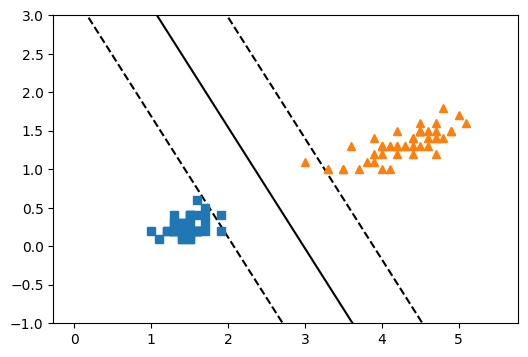

In [21]:
plt.figure(figsize=(6, 4))

w = svm_clf.coef_[0] # 왜 0을 해주냐? coef_의 반환값은 2차원 리스트. 첫 번째 리스트만 뽑아서 보내기 위해
b = svm_clf.intercept_

# 결정 경계 시각화
plot_decision_boundary(w, b, 0, 5.5)

# 데이터셋 시각화
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s") # Setosa의 petal length, width
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^") # Versicolor의 petal length, width
plt.ylim(-1, 3)

plt.show()

## [P.2] Soft Margin SVM

In [53]:
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2)  # Iris-Virginica
# Virginica가 맞냐 아니냐에 대한 이진 분류 수행

In [54]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

`sklearn`에서는 [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)이란 클래스를 제공하며, 학습의 편이성을 매우 높여줌
해당 클래스는 다양한 하이퍼파라미터에 대해서 교차 검증을 진행할 때 필요한 여러 스텝을 묶어놓은 것으로 이해하면 됨   
필요한 argument는 학습에 사용될 모델과 데이터 전처리에 사용할 transforms가 있음

여기서는 [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) 변환과 [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)(선형 커널 함수를 사용한 `SVC`와 동일하지만, 좀 더 다양한 손실 함수와 정규화를 사용할 수 있음) 모델을 사용

In [55]:
from sklearn.pipeline import Pipeline # 모델 학습과 전처리를 한 번에 진행해주는 패키지
from sklearn.preprocessing import StandardScaler # 전처리(정규화 -> z = (x - u) / s) 패키지
from sklearn.svm import LinearSVC

In [56]:
svm_clf = Pipeline([('scaler', StandardScaler()), ('svc', LinearSVC(C=1))]) # C는 앱실론 규제용

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', LinearSVC(C=1))])

하이퍼파라미터 `C`에 대해서 어떻게 동작하는지 확인하기

In [57]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1) # C 1
svm_clf2 = LinearSVC(C=100) # C 100

pip_svm_clf1 = Pipeline([('scaler', scaler), ('svc', svm_clf1)])
pip_svm_clf2 = Pipeline([('scaler', scaler), ('svc', svm_clf2)])

pip_svm_clf1.fit(X, y)
pip_svm_clf2.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('svc', LinearSVC(C=100))])

In [58]:
# scaler
scaler.mean_, scaler.scale_ # 평균과 표준편차

(array([3.758     , 1.19933333]), array([1.75940407, 0.75969263]))

위에서 구한 파라미터 w와 b는 `StandardScaler`가 적용된 z에 대한 선형 함수 (y = w z + b) 인 상황임    

In [59]:
# z = (x- m) /s => z는 x값을 정규화시킨 것
m = scaler.mean_
s = scaler.scale_

z0 = (X[:, 0] - m[0]) / s[0] # 첫 번째 피처에 대한 정규화
z1 = (X[:, 1] - m[1]) / s[1] # 두 번째 피처에 대한 정규화

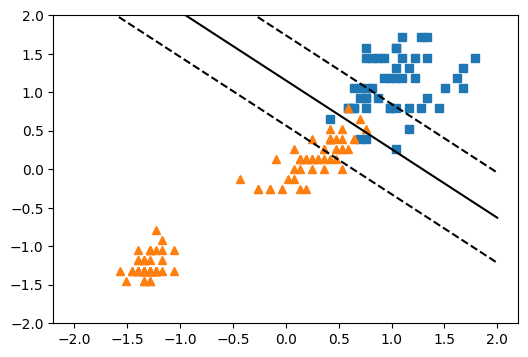

In [60]:
plt.figure(figsize=(6, 4))

plt.plot(z0[y==1], z1[y==1], "s")
plt.plot(z0[y==0], z1[y==0], "^")

w = svm_clf1.coef_[0]
b = svm_clf1.intercept_
plot_decision_boundary(w, b, -2, 2)
plt.ylim(-2, 2)
plt.show()

위의 margin 사이에 있는 값들이 support vector가 되는 것

In [61]:
print(w, b)

[1.52204825 1.70722733] [-1.97047503]


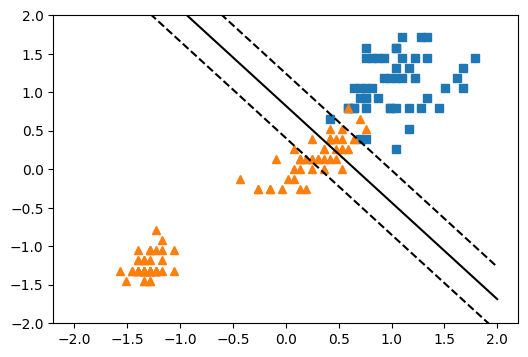

In [62]:
plt.figure(figsize=(6, 4))

plt.plot(z0[y==1], z1[y==1], "s")
plt.plot(z0[y==0], z1[y==0], "^")

w = svm_clf2.coef_[0]
plot_decision_boundary(w, b, -2, 2)
plt.ylim(-2, 2)
plt.show()

사이킷런의 SVM 모델은 `C` 하이퍼파라미터 값이 작아지면, 정규화의 강도가 더 세짐      
정규화 강도가 세진다는 말은 분산 오류가 줄어든다는 것이고, SVM에서 분산 오류를 줄어들게 하려면 마진의 폭이 커져야 함    
따라서 `C=1`일 때는 서포트 벡터의 수가 많고, 반대로 100의 값일 때는 수가 줄어든 모델이 학습됨

## [P.3] Non-linear SVM

비선형 데이터를 위해서 사이킷런의 [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) 데이터셋 활용

In [90]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1) # add noise
X.shape, y.shape

((1000, 2), (1000,))

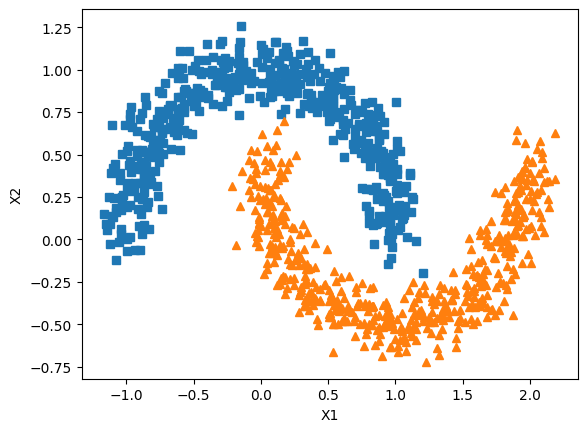

In [91]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")

    plt.xlabel("X1")
    plt.ylabel("X2")

plot_dataset(X, y)

모델로는 일전에 사용했던 `SVC` 클래스를 사용하지만, polynomial 커널 함수로 설정하기     
3차 커널 함수를 예시로 코드를 구현하고 학습시키기

In [92]:
from sklearn.svm import SVC

# coef0 argument controls how much the model is influenced by high-degree polynomials
poly3_svm_clf = Pipeline([('scale', StandardScaler()), ('svc', SVC(kernel='poly', degree=3, coef0=10, C=5))])
poly3_svm_clf.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(C=5, coef0=10, kernel='poly'))])

In [93]:
poly10_svm_clf = Pipeline([('scale', StandardScaler()), ('svc', SVC(kernel='poly', degree=10, coef0=10, C=5))])
poly10_svm_clf.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(C=5, coef0=10, degree=10, kernel='poly'))])

In [94]:
def plot_predictions(clf):
    x0 = np.linspace(-3, 3, 100)
    print(x0.shape)
    x1 = np.linspace(-3, 3, 100)
    x0, x1 = np.meshgrid(x0, x1)
    print(x0.shape)
    X = np.c_[x0.ravel(), x1.ravel()] # np.c_ : 두 리스트를 열 요소끼리 합치는 함수
    # np.ravel() : 다차원 리스트를 1차원 리스트로 펼치는 함수
    print(X.shape)

    y_pred = clf.predict(X)
    print(y_pred.shape)
    y_pred = y_pred.reshape(x0.shape)
    print(y_pred.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.1)

위 코드 한 번에 설명하는 블로그<br>
https://m31phy.tistory.com/220

(100,)
(100, 100)
(10000, 2)
(10000,)
(100, 100)


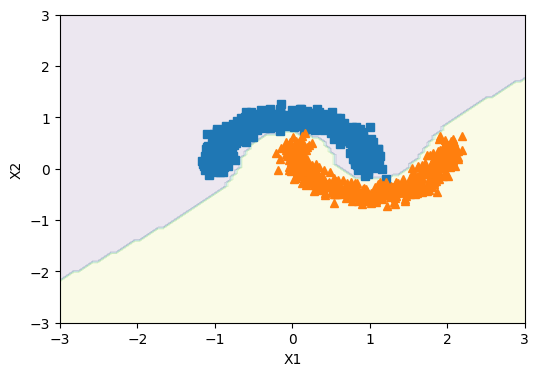

In [95]:
plt.figure(figsize=(6, 4))

plot_predictions(poly3_svm_clf)
plot_dataset(X, y)
plt.show()

(100,)
(100, 100)
(10000, 2)
(10000,)
(100, 100)


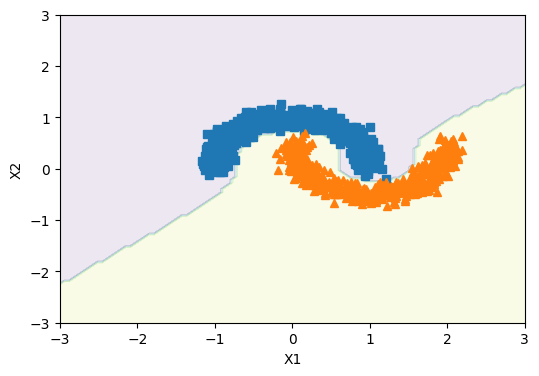

In [96]:
plt.figure(figsize=(6, 4))

plot_predictions(poly10_svm_clf)
plot_dataset(X, y)
plt.show()

커널 함수가 좀더 비선형 함수가 되면서, 학습 데이터셋에 오버피팅 되는 경향을 볼 수 있음

이번에는 polynomial 커널 함수가 아닌, rbf 커널 함수를 사용해서 학습하기<br>
일반적으로 rbf 커널을 많이 사용<br>
polynomial가 아니니까 degree, coef0 필요 x

In [99]:
rbf_svm_clf =  Pipeline([('scale', StandardScaler()), ('svc', SVC(kernel='rbf', gamma=5, C=5))])
rbf_svm_clf.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('svc', SVC(C=5, gamma=5))])

(100,)
(100, 100)
(10000, 2)
(10000,)
(100, 100)


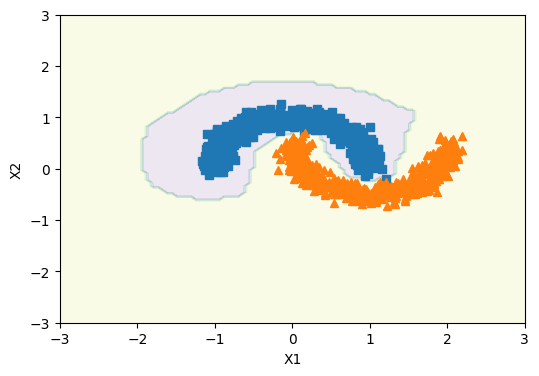

In [100]:
plt.figure(figsize=(6, 4))

plot_predictions(rbf_svm_clf)
plot_dataset(X, y)
plt.show()